In [38]:
import pandas as pd

# Example data
data = {
    "PC Count": ["2048PC", "1024PC", "512PC"],  # Adjust for actual counts
    "RSS Min (GB)": [0.0166015625, 0.0166015625, 0.0166015625],  # Adjust values
    "RSS Max (GB)": [607.9329566955566, 619.6312980651855, 634.2348594665527],
    "RSS Mean (GB)": [476.261800190942, 501.67310991646843, 489.1752582892257],
    "VSZ Min (GB)": [0.19896697998046875, 0.10074996948242188, 0.11195755004882812],
    "VSZ Max (GB)": [767.9050598144531, 804.7165260314941, 798.0450859069824],
    "VSZ Mean (GB)": [608.5142527579001, 656.8318149331349, 627.4471390732148],
    "majflt/s Mean": [1959.3490041532941, 1892.0327457643118, 1862.7025723184372],
    "minflt/s Mean": [73122.43919529923, 95719.94479352495, 76566.84251097165]
}

df_comparison = pd.DataFrame(data)

# Print the DataFrame
print(df_comparison.to_string(index=False))

PC Count  RSS Min (GB)  RSS Max (GB)  RSS Mean (GB)  VSZ Min (GB)  VSZ Max (GB)  VSZ Mean (GB)  majflt/s Mean  minflt/s Mean
  2048PC      0.016602    607.932957     476.261800      0.198967    767.905060     608.514253    1959.349004   73122.439195
  1024PC      0.016602    619.631298     501.673110      0.100750    804.716526     656.831815    1892.032746   95719.944794
   512PC      0.016602    634.234859     489.175258      0.111958    798.045086     627.447139    1862.702572   76566.842511


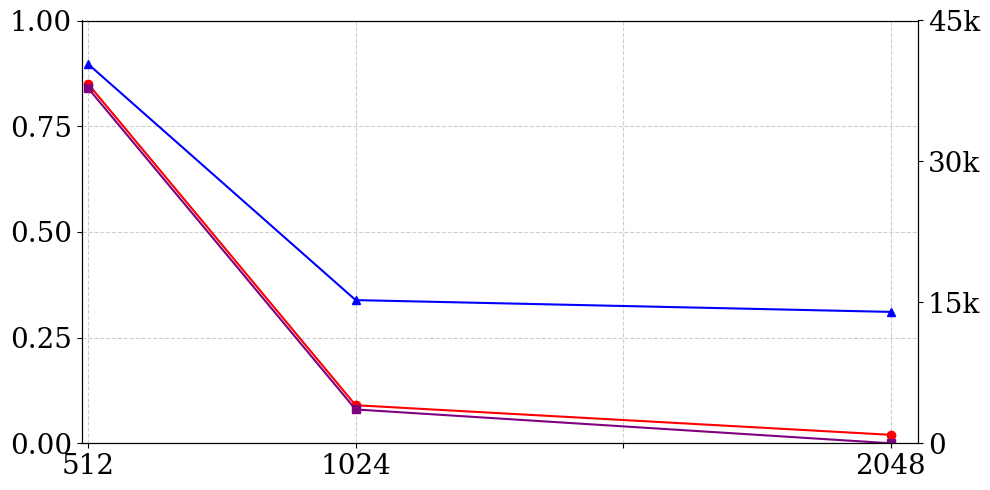

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    "PC Count": ["2048PC", "1024PC", "512PC"],
    "Misses Mean": [0.02, 0.09, 0.85],
    "Evictions Mean": [0.00, 0.08, 0.84],
    "Program Cache Time Mean (µs)": [13984.30, 15239.21, 40363.97]
}

# Create a DataFrame
df = pd.DataFrame(data)
df["PC Count Numeric"] = [2048, 1024, 512]
df = df.sort_values("PC Count Numeric")

# Set font globally to serif
plt.rcParams["font.family"] = "serif"

# Create figure
fig, ax1 = plt.subplots(figsize=(10, 5))

# Left Y-axis: Misses & Evictions
ax1.plot(df["PC Count Numeric"], df["Misses Mean"], marker='o', linestyle='-', color='red')
ax1.plot(df["PC Count Numeric"], df["Evictions Mean"], marker='s', linestyle='-', color='purple')
ax1.set_ylim(0, 1.0)
ax1.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
ax1.tick_params(axis='y', labelcolor='black', labelsize=20)

# Right Y-axis: Program Cache Time
ax2 = ax1.twinx()
ax2.plot(df["PC Count Numeric"], df["Program Cache Time Mean (µs)"], marker='^', linestyle='-', color='blue')
ax2.set_ylim(0, 45000)
ax2.set_yticks([0, 15000, 30000, 45000])
ax2.set_yticklabels(["0", "15k", "30k", "45k"], fontsize=20)
ax2.tick_params(axis='y', labelcolor='black')

# X-axis formatting
ax1.set_xticks([512, 1024, 1536, 2048])
ax1.set_xticklabels(["512", "1024", "", "2048"], fontsize=20)
ax1.set_xlim(500, 2100)

# General layout
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax2.set_ylabel(None)
ax1.grid(True, linestyle='--', alpha=0.6)
fig.tight_layout()

# Remove legends and title
ax1.legend().remove() if ax1.get_legend() else None
ax2.legend().remove() if ax2.get_legend() else None
plt.title(None)

# Save as PDF
plt.savefig("CachePerformance.pdf")